## Цель вычислительного эксперимента
Решить задачу выбора алгоритма оптимизации на наборе данных MNIST с использованием нейронных сетей простой структуры. Выбор произвести между алгоритмами: SGD, Nesterov Momentum, Adam; по значениям скорости сходимости, значения оптимума и вида траектории. В качестве структурного параметра используется количество нейронов

##Описание выборки
Выборка состоит из 70000 изображений рукописного написания цифр размера 28×28 пикселей.

##Блок загрузки и предобработки выборки

Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


Загрузка датасета

11493376/11490434 [==============================] - 2s 0us/step


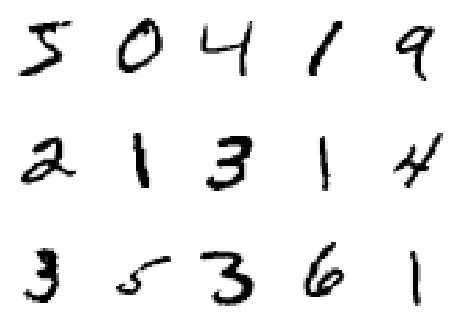

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data = X_train
labels = y_train

fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

Изображение 28×28 пикселей представляется в виде массива размера 784

In [3]:
num_pixels = X_train.shape[1] * X_train.shape[2]
data = data.reshape(X_train.shape[0], num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

data = pd.DataFrame(data=data,    # values
                    index=np.arange(data.shape[0]),    # 1st column as index
                    columns=np.arange(data.shape[1]))  # 1st row as the column names
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Нормализация объектов выборки: из 0-255 в 0-1

In [0]:
X_train = X_train/255
X_test = X_test/255

Классы (10 цифр) представляются в виде бинарных матриц размера 2×2

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##Графики анализа состава выборки

###Анализ выбросов, гистограмма







/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


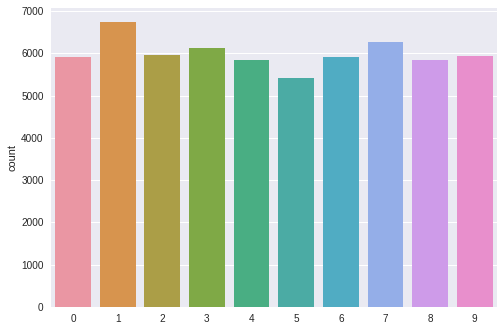

In [6]:
sns.countplot(labels)

Выбросов не наблюдается

###Анализ пропусков, статистика

In [7]:
data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

В выборке нет пропусков или испорченных данных

###Анализ мультикорелляции признаков, кор. матрица

In [0]:
#corr_matrix = data.corr()

Не удалось получить наглядную корелляционную матрицу для 784 признаков

##Список моделей
Строится нейронная сеть простой стуктуры

##Список функций ошибки, критериев качества
Критерии качества, используемые в задаче:

*   скорость сходимости
*   значение оптимума
*   вид траектории





##Способ разбиения выборки на обучение-контроль
Используется разбиение, предлагаемое функцией load_data() модуля mnist библиотеки keras. А именно, 60000  и 10000 объектов на обучение и контроль соответсвенно.

##Анализ выбранной модели на разбиении обучение-контроль

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def baseline_model(optimizer='adam', param=num_pixels):
	
	model = Sequential()
	model.add(Dense(param, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [0]:
optimizers = ['adam', 'SGD', 'nadam']
accuracy = list()
history = dict()

for optimizer in optimizers:
    model = baseline_model(optimizer)
    history[optimizer] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    accuracy.append(scores[1])
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2807 - acc: 0.9189 - val_loss: 0.1363 - val_acc: 0.9605
Epoch 2/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1109 - acc: 0.9678 - val_loss: 0.0933 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0701 - acc: 0.9799 - val_loss: 0.0811 - val_acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0494 - acc: 0.9859 - val_loss: 0.0701 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0363 - acc: 0.9899 - val_loss: 0.0649 - val_acc: 0.9792
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0256 - acc: 0.9933 - val_loss: 0.0637 - val_acc: 0.9796
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0185 - acc: 0.9956 - val_loss: 0.0564 - 

По значению оптимума (Baseline Error) лучшим является алгоритм ADAM

###Графики скорости сходимости функции ошибки (зависимости функции ошибки от номера итерации оптимизационного алгоритма) со ст. откл.

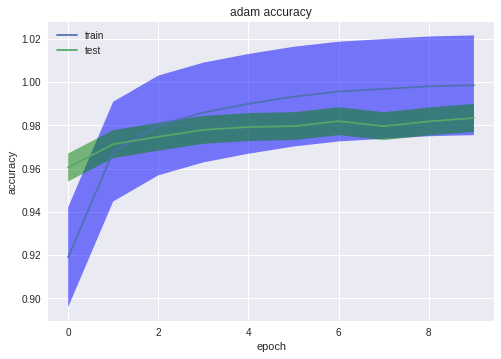

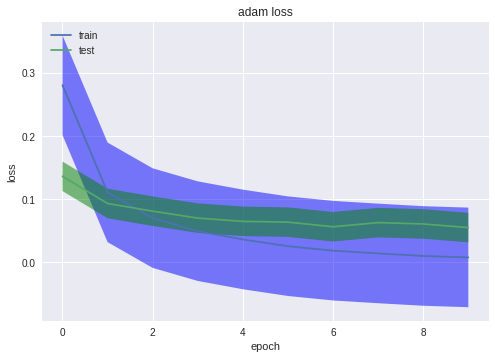

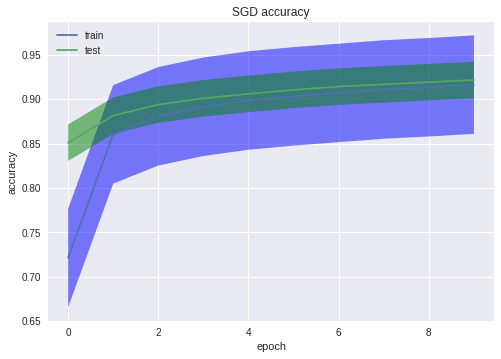

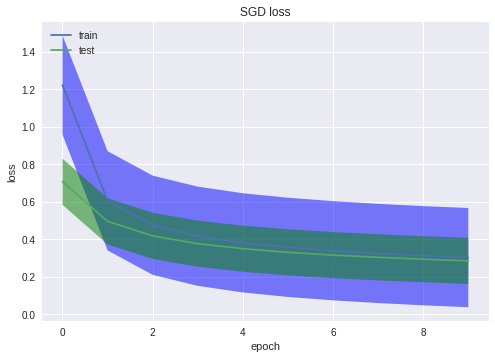

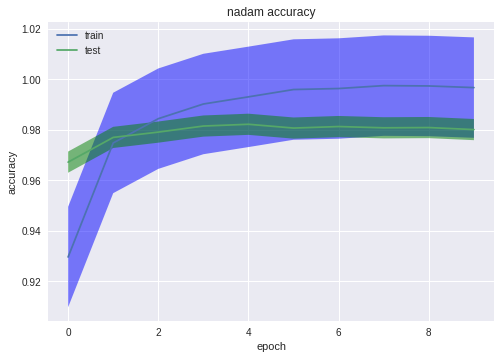

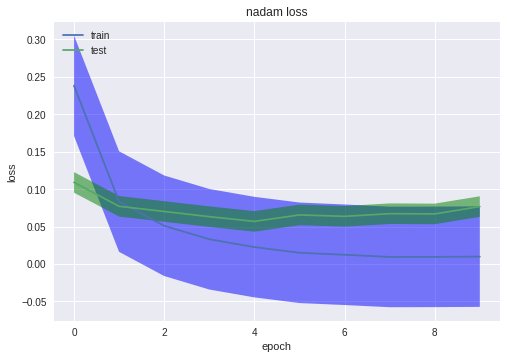

In [0]:
for optimizer in optimizers:
    # summarize history for accuracy
    t_train_acc = np.array(history[optimizer].history['acc'])
    std_train_acc = t_train_acc.std()
    t_test_acc = np.array(history[optimizer].history['val_acc'])
    std_test_acc = t_test_acc.std()
    plt.plot(t_train_acc)
    plt.fill_between(np.arange(t_train_acc.shape[0]), t_train_acc+std_train_acc,
                     t_train_acc-std_train_acc, facecolor='blue', alpha=0.5)
    plt.plot(t_test_acc)
    plt.fill_between(np.arange(t_test_acc.shape[0]), t_test_acc+std_test_acc,
                     t_test_acc-std_test_acc, facecolor='green', alpha=0.5)
    plt.title('{} accuracy'.format(optimizer))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    t_train_loss = np.array(history[optimizer].history['loss'])
    std_train_loss = t_train_loss.std()
    t_test_loss = np.array(history[optimizer].history['val_loss'])
    std_test_loss = t_test_loss.std()
    plt.plot(t_train_loss)
    plt.fill_between(np.arange(t_train_loss.shape[0]), t_train_loss+std_train_loss,
                     t_train_loss-std_train_loss, facecolor='blue', alpha=0.5)
    plt.plot(t_test_loss)
    plt.fill_between(np.arange(t_test_loss.shape[0]), t_test_loss+std_test_loss,
                     t_test_loss-std_test_loss, facecolor='green', alpha=0.5)
    plt.title('{} loss'.format(optimizer))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

По скорости сходимости также выигрывает ADAM

###График зависимости функции ошибки от значения структурного параметра со ст. откл.
В качестве структурных параметров выбраны число нейронов во входном слое и размер пачки входящих объектов (batch_size). Рассмотрим 5 значений первого параметра от 10 до 784 и также 5 для второго: от 10 до 300. Для увеличения сходимости уменьшено количество раундов, что негативно влияет на точность

In [79]:
optimizers = ['adam', 'SGD', 'nadam']
params = np.linspace(10, 784, num=5, dtype='Int32')
batch_size_list = np.linspace(10, 300, num=5, dtype='Int32')

accuracy = {optimizer: list() for optimizer in optimizers}

for optimizer in optimizers:
    for param in params:
        for batch_size in batch_size_list:
            model = baseline_model(optimizer, param)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=batch_size, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            accuracy[optimizer].append(scores[1])
            print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 23s 386us/step - loss: 0.4331 - acc: 0.8773 - val_loss: 0.2931 - val_acc: 0.9171
Epoch 2/4
60000/60000 [==============================] - 17s 284us/step - loss: 0.2833 - acc: 0.9178 - val_loss: 0.2640 - val_acc: 0.9252
Epoch 3/4
60000/60000 [==============================] - 17s 284us/step - loss: 0.2579 - acc: 0.9260 - val_loss: 0.2509 - val_acc: 0.9267
Epoch 4/4
60000/60000 [==============================] - 17s 290us/step - loss: 0.2439 - acc: 0.9301 - val_loss: 0.2516 - val_acc: 0.9274
Baseline Error: 7.26%
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 9s 154us/step - loss: 0.7801 - acc: 0.7707 - val_loss: 0.3635 - val_acc: 0.8945
Epoch 2/4
60000/60000 [==============================] - 3s 45us/step - loss: 0.3317 - acc: 0.9053 - val_loss: 0.2964 - val_acc: 0.9168
Epoch 3/4
60000/60000 [==============================

####Зависимость точности от двух параметров

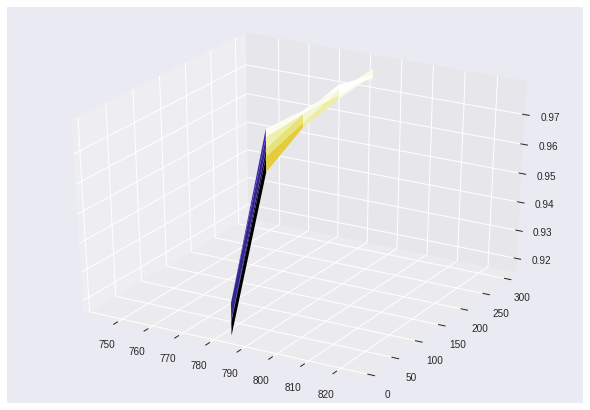

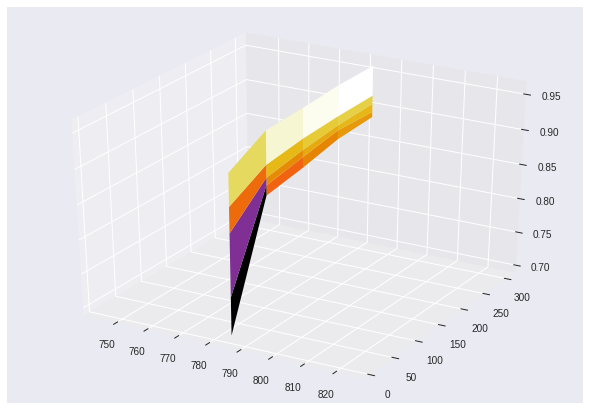

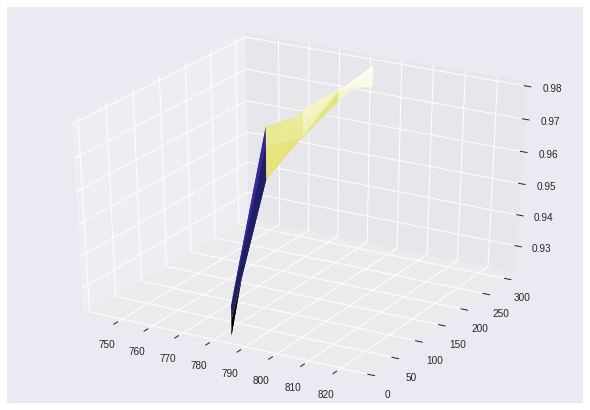

In [80]:
from mpl_toolkits.mplot3d import Axes3D

for optimizer in optimizers:
    acc = np.array(accuracy[optimizer]).reshape((5, 5))
    fig = plt.figure()
    ax = Axes3D(fig)
    X = param
    Y = batch_size_list
    X, Y = np.meshgrid(X, Y)
    Z = acc
    
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='CMRmap')

Из графиков видно, что параметр batch_size не оказывает влияние на точность. В дальнейшем будет использоваться только один параметр (число нейронов)

####Зависимость точности от одного параметра (число нейронов)

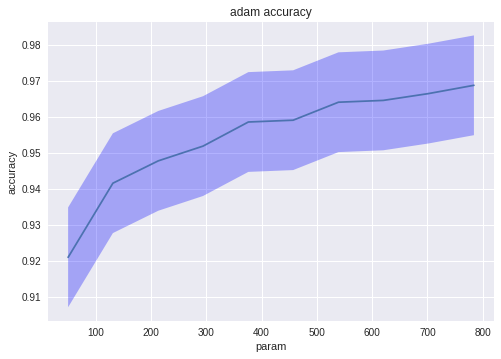

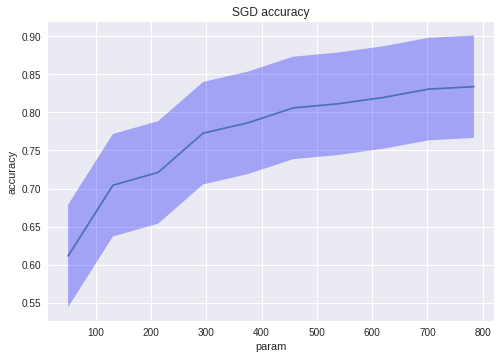

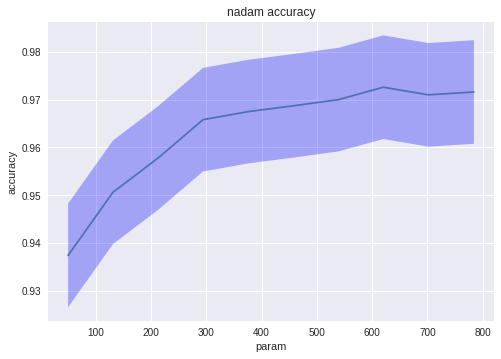

In [32]:
for optimizer in optimizers:
    x = np.array(params)
    acc = np.array(accuracy[optimizer])
    std_acc = acc.std()
    
    plt.plot(x, acc)
    plt.fill_between(x, acc+std_acc,
                     acc-std_acc, facecolor='blue', alpha=0.3)
    plt.title('{} accuracy'.format(optimizer))
    plt.ylabel('accuracy')
    plt.xlabel('param')
    plt.show()

Графики показывают, что точность начинает убывать для значения параметра <300 для всех трех алгоритмов. Также видно, что SGD убывает быстрее всего. Высокое стандартное отклонение не позволяет выявить отличия у ADAM и Nesterov Momentum

### График зависимости значения функции ошибки от значения структурного параметра для лучшего алгорима
Здесь исследуется зависимость точности алгоритма ADAM от значения параметра. Рассмотрим 10 значений числа нейронов: от 1 до 50

In [74]:
params = np.linspace(1, 50, num=10, dtype='Int32')
optimizer = 'adam'
accuracy = list()

for param in params:
        model = baseline_model(optimizer, param)
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=1000, verbose=1)
        scores = model.evaluate(X_test, y_test, verbose=0)
        accuracy.append(scores[1])
        print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 6s 101us/step - loss: 2.2658 - acc: 0.1377 - val_loss: 2.2056 - val_acc: 0.1742
Epoch 2/8
60000/60000 [==============================] - 0s 7us/step - loss: 2.1382 - acc: 0.1855 - val_loss: 2.0781 - val_acc: 0.1872
Epoch 3/8
60000/60000 [==============================] - 0s 6us/step - loss: 2.0399 - acc: 0.1979 - val_loss: 2.0086 - val_acc: 0.2037
Epoch 4/8
60000/60000 [==============================] - 0s 7us/step - loss: 1.9852 - acc: 0.2024 - val_loss: 1.9668 - val_acc: 0.2095
Epoch 5/8
60000/60000 [==============================] - 0s 6us/step - loss: 1.9488 - acc: 0.2064 - val_loss: 1.9364 - val_acc: 0.2122
Epoch 6/8
60000/60000 [==============================] - 0s 6us/step - loss: 1.9214 - acc: 0.2104 - val_loss: 1.9122 - val_acc: 0.2141
Epoch 7/8
60000/60000 [==============================] - 0s 6us/step - loss: 1.8993 - acc: 0.2133 - val_loss: 1.8931 - val_acc: 0.2153
Epo

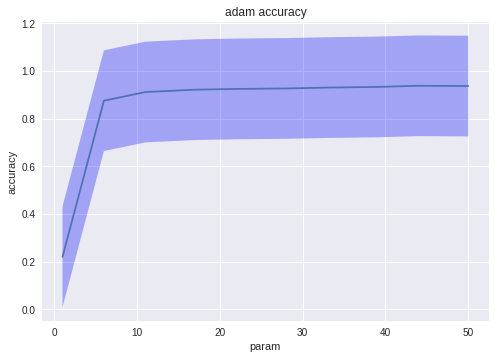

In [75]:
x = np.array(params)
acc = np.array(accuracy)
std_acc = acc.std()

plt.plot(x, acc)
plt.fill_between(x, acc+std_acc,
                 acc-std_acc, facecolor='blue', alpha=0.3)
plt.title('{} accuracy'.format(optimizer))
plt.ylabel('accuracy')
plt.xlabel('param')
plt.show()

Видно, что можно выбрать значение параметра 10 без дначительной потери качества модели

##Вывод
Для данной задачи среди предложенных алгоритмов оптимизации лучшим является ADAM